# KNN Imputation - NaN value compensation
For dealing with missing values, KNN algorithm has proven to be generally effective. Often referred as "nearest neighbor imputation".

Identify and replace missing values for each column in input data prior to modeling prediciton task.

Keep in mind there are different missing value compensation methods such as:
- Keep it as it is
- Mean/median
- Constant
- KNN
- Mice
- Deeplearning (Datawig)

In [54]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#load dataset
d = '/data.csv'
with open(sys.path[0].replace('/Notebook','/data')+d,'r') as data:
    df = pd.read_csv(data)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [19]:
#any null values among columns?
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
#Too little NaN values.. lets add some more

i1 = np.random.choice(a=df.index, size = 45)
i2 = np.random.choice(a=df.index, size = 30)

In [21]:
i1

array([294,   0,  43, 306, 370, 496, 366,  71, 437, 357, 102,  20, 112,
       424, 186, 199, 225,  73, 458, 237, 167, 226, 119, 279, 181, 483,
        63, 493, 161, 196,  45, 481, 376, 304,  22, 228, 419, 217, 135,
       251, 350,  80, 383, 134, 144])

In [22]:
i2

array([371, 264,  51, 454, 464, 199, 328, 125,  20, 264, 480, 133, 332,
       257, 484,  33, 498,  19, 182,  43,  78, 379, 492,  96, 106, 387,
       284, 152, 309, 322])

In [23]:
df.loc[i1, 'NOX'] = np.nan
df.loc[i2, 'PTRATIO'] = np.nan

In [24]:
#check
df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX        45
RM          5
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO    29
B           0
LSTAT       0
MEDV        0
dtype: int64

In [26]:
# KNN Imputation method
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

In [27]:
df_imputed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.4568,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0.0,0.5610,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.0,0.5610,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0.0,0.5610,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0.0,0.5610,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


In [28]:
#check KNN imputation worked
df_imputed.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Imputation worked.. but how do we determine best parameter for KNN Imputer? (n_neighbor=?)

## Imputation optimization
Since the target variable (MEDV) is continuous, prediction can be done through regression modeling. Meaning that we can train with various K parameters to find which K shows best optimization performance.

But we need to import first. we need some functions to be pulled from Scikit-Learn in order to split train and test dataset, train, and validate them.

For training, RandomForest has been used. RMSE for validation test.

In [29]:
#import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [51]:
# function for returning parameter k and RMSE for validation test

def optimize_k(data, target):
    errors = []
    for k in range(1, 30):
        print(f'feeding {k} into k')
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        #X to store input, Y for output
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
    print(f'done {k} jobs')
    return errors

In [52]:
k_errors = optimize_k(df, 'MEDV')

feeding 1 into k
feeding 2 into k
feeding 3 into k
feeding 4 into k
feeding 5 into k
feeding 6 into k
feeding 7 into k
feeding 8 into k
feeding 9 into k
feeding 10 into k
feeding 11 into k
feeding 12 into k
feeding 13 into k
feeding 14 into k
feeding 15 into k
feeding 16 into k
feeding 17 into k
feeding 18 into k
feeding 19 into k
feeding 20 into k
feeding 21 into k
feeding 22 into k
feeding 23 into k
feeding 24 into k
feeding 25 into k
feeding 26 into k
feeding 27 into k
feeding 28 into k
feeding 29 into k
done 29 jobs


In [53]:
k_errors

[{'K': 1, 'RMSE': 5.399049161163491},
 {'K': 2, 'RMSE': 5.305707638354128},
 {'K': 3, 'RMSE': 5.383402930005903},
 {'K': 4, 'RMSE': 5.21423954559387},
 {'K': 5, 'RMSE': 5.198982034415465},
 {'K': 6, 'RMSE': 5.210250618238474},
 {'K': 7, 'RMSE': 5.159260460099454},
 {'K': 8, 'RMSE': 5.258854679841357},
 {'K': 9, 'RMSE': 5.309804479606617},
 {'K': 10, 'RMSE': 5.104746025081222},
 {'K': 11, 'RMSE': 5.165192870392113},
 {'K': 12, 'RMSE': 5.271495302867618},
 {'K': 13, 'RMSE': 5.22491011210831},
 {'K': 14, 'RMSE': 5.262039952909843},
 {'K': 15, 'RMSE': 5.172591790867656},
 {'K': 16, 'RMSE': 5.152590681216135},
 {'K': 17, 'RMSE': 5.009287867726069},
 {'K': 18, 'RMSE': 5.203538322878953},
 {'K': 19, 'RMSE': 5.223945491211183},
 {'K': 20, 'RMSE': 5.278174414097273},
 {'K': 21, 'RMSE': 5.269077662881403},
 {'K': 22, 'RMSE': 5.35897273067846},
 {'K': 23, 'RMSE': 5.402773836300535},
 {'K': 24, 'RMSE': 5.178326631164661},
 {'K': 25, 'RMSE': 5.338869181383108},
 {'K': 26, 'RMSE': 5.175021330100031}

In [62]:
#Parameter k with min RMSE (best performance)
minRMSE = min(k_errors, key=lambda x:x['RMSE'])
minRMSE

{'K': 17, 'RMSE': 5.009287867726069}

Text(0, 0.5, 'RMSE')

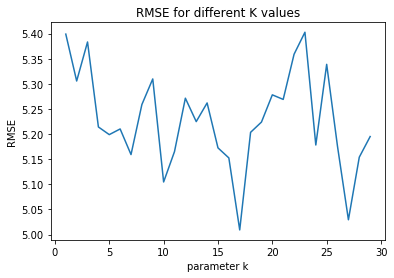

In [87]:
# visualization
k = []
RMSE = []

for i in range(len(k_errors)):
    iteration = list(k_errors[i].values())
    k.append(iteration[0])
    RMSE.append(iteration[1])

plt.plot(k, RMSE)
plt.title('RMSE for different K values')
plt.xlabel('parameter k')
plt.ylabel('RMSE')